In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, Dense, Flatten, concatenate, MultiHeadAttention, GlobalAveragePooling1D, BatchNormalization, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow as tf
from keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
# data = pd.read_csv('/content/drive/MyDrive/THESIS/FINAL/merged_data__album_NEWW.csv')
# data = pd.read_csv('/content/drive/MyDrive/Thesis/Dataset/merged_data__album_NEWW.csv') #file path yujin
data = pd.read_csv('merged_data__album_NEWW.csv') #file path yujin

In [4]:
data

,track_id,name,artist,tags,genre,year,duration_ms,danceability,energy,key,...,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
0,TRSKEXF128E078AF7C,Morning Passages,Philip Glass,"instrumental, classical, soundtrack, piano",New Age,2018,328145,0.372,0.102,7,...,0.000000,0.000000,0.000000,0.045181,0.767760,0.016267,1.692223,0.212041,0.064301,0.329596
1,TRSKEXF128E078AF7C,Morning Passages,Philip Glass,"instrumental, classical, soundtrack, piano",New Age,2018,328145,0.372,0.102,7,...,0.000000,0.000000,0.000000,0.045181,0.767760,0.016267,1.692223,0.212041,0.064301,0.329596
2,TRSKEXF128E078AF7C,Morning Passages,Philip Glass,"instrumental, classical, soundtrack, piano",New Age,2018,328145,0.372,0.102,7,...,0.000000,0.000000,0.000000,0.045181,0.767760,0.016267,1.692223,0.212041,0.064301,0.329596
3,TRSKEXF128E078AF7C,Morning Passages,Philip Glass,"instrumental, classical, soundtrack, piano",New Age,2018,328145,0.372,0.102,7,...,0.000000,0.000000,0.000000,0.045181,0.767760,0.016267,1.692223,0.212041,0.064301,0.329596
4,TRSKEXF128E078AF7C,Morning Passages,Philip Glass,"instrumental, classical, soundtrack, piano",New Age,2018,328145,0.372,0.102,7,...,0.000000,0.000000,0.000000,0.045181,0.767760,0.016267,1.692223,0.212041,0.064301,0.329596
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174055,TRUJNZX12903CF3B0A,I Heard of a Girl,Miss Li,"pop, swedish",Pop,2009,165019,0.611,0.836,0,...,0.121793,0.057930,0.576478,4.047888,0.301266,0.032846,0.741970,0.441482,0.331376,0.426365
174056,TRWCTXL128F426FD56,"Dead Cities, Red Seas & Lost Ghosts",M83,"ambient, french, idm, dark_ambient, avant_gard...",Electronic,2004,1059040,0.176,0.218,0,...,0.000000,0.000000,0.242812,0.276838,0.168773,0.196562,0.039931,0.676812,0.323926,0.049490
174057,TRSKCBX128F92DFC7F,Nasty Naughty Boy,Christina Aguilera,"pop, female_vocalists, jazz, soul, american, r...",Pop,2006,285106,0.367,0.744,1,...,0.061933,0.379165,1.005565,1.642387,0.751219,0.233064,0.077737,0.008309,0.431949,0.232060
174058,TRESPFZ128F933704B,On It,Mindless Self Indulgence,"punk, industrial",Electronic,2008,181946,0.635,0.603,6,...,0.716334,0.014448,0.019981,0.432884,0.000000,0.001906,0.578340,0.546926,0.603386,0.000000


In [5]:
data = data.dropna()

In [6]:
data

,track_id,name,artist,tags,genre,year,duration_ms,danceability,energy,key,...,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
0,TRSKEXF128E078AF7C,Morning Passages,Philip Glass,"instrumental, classical, soundtrack, piano",New Age,2018,328145,0.372,0.102,7,...,0.000000,0.000000,0.000000,0.045181,0.767760,0.016267,1.692223,0.212041,0.064301,0.329596
1,TRSKEXF128E078AF7C,Morning Passages,Philip Glass,"instrumental, classical, soundtrack, piano",New Age,2018,328145,0.372,0.102,7,...,0.000000,0.000000,0.000000,0.045181,0.767760,0.016267,1.692223,0.212041,0.064301,0.329596
2,TRSKEXF128E078AF7C,Morning Passages,Philip Glass,"instrumental, classical, soundtrack, piano",New Age,2018,328145,0.372,0.102,7,...,0.000000,0.000000,0.000000,0.045181,0.767760,0.016267,1.692223,0.212041,0.064301,0.329596
3,TRSKEXF128E078AF7C,Morning Passages,Philip Glass,"instrumental, classical, soundtrack, piano",New Age,2018,328145,0.372,0.102,7,...,0.000000,0.000000,0.000000,0.045181,0.767760,0.016267,1.692223,0.212041,0.064301,0.329596
4,TRSKEXF128E078AF7C,Morning Passages,Philip Glass,"instrumental, classical, soundtrack, piano",New Age,2018,328145,0.372,0.102,7,...,0.000000,0.000000,0.000000,0.045181,0.767760,0.016267,1.692223,0.212041,0.064301,0.329596
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174055,TRUJNZX12903CF3B0A,I Heard of a Girl,Miss Li,"pop, swedish",Pop,2009,165019,0.611,0.836,0,...,0.121793,0.057930,0.576478,4.047888,0.301266,0.032846,0.741970,0.441482,0.331376,0.426365
174056,TRWCTXL128F426FD56,"Dead Cities, Red Seas & Lost Ghosts",M83,"ambient, french, idm, dark_ambient, avant_gard...",Electronic,2004,1059040,0.176,0.218,0,...,0.000000,0.000000,0.242812,0.276838,0.168773,0.196562,0.039931,0.676812,0.323926,0.049490
174057,TRSKCBX128F92DFC7F,Nasty Naughty Boy,Christina Aguilera,"pop, female_vocalists, jazz, soul, american, r...",Pop,2006,285106,0.367,0.744,1,...,0.061933,0.379165,1.005565,1.642387,0.751219,0.233064,0.077737,0.008309,0.431949,0.232060
174058,TRESPFZ128F933704B,On It,Mindless Self Indulgence,"punk, industrial",Electronic,2008,181946,0.635,0.603,6,...,0.716334,0.014448,0.019981,0.432884,0.000000,0.001906,0.578340,0.546926,0.603386,0.000000


In [7]:
data.columns

Index(['track_id', 'name', 'artist', 'tags', 'genre', 'year', 'duration_ms',
       'danceability', 'energy', 'key',
       ...
       '2038', '2039', '2040', '2041', '2042', '2043', '2044', '2045', '2046',
       '2047'],
      dtype='object', length=2070)

In [8]:
label_counts_per_user = data.groupby('user_id')['label'].value_counts()
label_counts_per_user

user_id                                   label
000d80cd9b58a8f77b33aa613dcfc5cbf1daf5e8  0        10
                                          1        10
001889ee41b5f31c404a1abe4af07b2377fa776b  0        10
                                          1        10
001fd039ab4472039d22f9481bb5c5d376c3032f  0        10
                                                   ..
fff6c30c773e6ffafcac213c9afd9666afaf6d63  1        10
fffb0b218640d86e5cb99d41cd3ecad977142da5  0        10
                                          1        10
fffc0df75a48d823ad5abfaf2a1ee61eb1e3302c  0        10
                                          1        10
Name: count, Length: 17406, dtype: int64

In [9]:
num_features = ['year', 'duration_ms','danceability', 'energy', 'loudness', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'key', 'mode', 'time_signature']

In [10]:
data[num_features]

,year,duration_ms,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,key,mode,time_signature
0,2018,328145,0.372,0.102,-22.388,0.0418,0.98300,0.8250,0.1840,0.0392,122.158,7,0,4
1,2018,328145,0.372,0.102,-22.388,0.0418,0.98300,0.8250,0.1840,0.0392,122.158,7,0,4
2,2018,328145,0.372,0.102,-22.388,0.0418,0.98300,0.8250,0.1840,0.0392,122.158,7,0,4
3,2018,328145,0.372,0.102,-22.388,0.0418,0.98300,0.8250,0.1840,0.0392,122.158,7,0,4
4,2018,328145,0.372,0.102,-22.388,0.0418,0.98300,0.8250,0.1840,0.0392,122.158,7,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174055,2009,165019,0.611,0.836,-5.217,0.0327,0.01420,0.0215,0.0780,0.9740,140.257,0,1,4
174056,2004,1059040,0.176,0.218,-10.831,0.0429,0.09780,0.9530,0.1410,0.0349,119.920,0,1,4
174057,2006,285106,0.367,0.744,-4.980,0.1130,0.10400,0.0000,0.7350,0.2910,112.589,1,1,3
174058,2008,181946,0.635,0.603,-4.106,0.4300,0.06710,0.0000,0.0604,0.8520,128.806,6,1,4


In [11]:
data.isnull().sum()

track_id    0
name        0
artist      0
tags        0
genre       0
           ..
2043        0
2044        0
2045        0
2046        0
2047        0
Length: 2070, dtype: int64

# Music Data Preparation

In [12]:
merged_data = data.copy()

#### Label Encoder

In [13]:
#track_id
encoder_track_id = LabelEncoder()
merged_data.loc[:, 'track_id'] = encoder_track_id.fit_transform(merged_data['track_id'])

In [14]:
data['track_id']

0         TRSKEXF128E078AF7C
1         TRSKEXF128E078AF7C
2         TRSKEXF128E078AF7C
3         TRSKEXF128E078AF7C
4         TRSKEXF128E078AF7C
                 ...        
174055    TRUJNZX12903CF3B0A
174056    TRWCTXL128F426FD56
174057    TRSKCBX128F92DFC7F
174058    TRESPFZ128F933704B
174059    TRQUYSJ128F92EA2E3
Name: track_id, Length: 174060, dtype: object

In [15]:
merged_data['track_id']

0         3726
1         3726
2         3726
3         3726
4         3726
          ... 
174055    4104
174056    4424
174057    3723
174058    1030
174059    3404
Name: track_id, Length: 174060, dtype: object

In [16]:
#artist
encoder_artist = LabelEncoder()
merged_data.loc[:, 'artist'] = encoder_artist.fit_transform(merged_data['artist'])

In [17]:
data['artist']

0                     Philip Glass
1                     Philip Glass
2                     Philip Glass
3                     Philip Glass
4                     Philip Glass
                    ...           
174055                     Miss Li
174056                         M83
174057          Christina Aguilera
174058    Mindless Self Indulgence
174059                      Slayer
Name: artist, Length: 174060, dtype: object

In [18]:
merged_data['artist']

0         1203
1         1203
2         1203
3         1203
4         1203
          ... 
174055    1040
174056     956
174057     344
174058    1033
174059    1381
Name: artist, Length: 174060, dtype: object

In [19]:
#genre
encoder_genre = LabelEncoder()
merged_data.loc[:, 'genre'] = encoder_genre.fit_transform(merged_data['genre'])

In [20]:
print(data['genre'].unique())

['New Age' 'Pop' 'Metal' 'Blues' 'Latin' 'World' 'RnB' 'Reggae'
 'Electronic' 'Rock' 'Punk' 'Country']


In [21]:
print(merged_data['genre'].unique())

[5 6 4 0 3 11 9 8 2 10 7 1]


In [22]:
merged_data['genre']

0         5
1         5
2         5
3         5
4         5
         ..
174055    6
174056    2
174057    6
174058    2
174059    4
Name: genre, Length: 174060, dtype: object

In [23]:
#tags
merged_data['tags'] = merged_data['tags'].str.split(',')
all_tags = [tag.strip() for tags in merged_data['tags'] for tag in tags]

In [24]:
encoder_tags = LabelEncoder()
encoder_tags.fit(all_tags)
merged_data['tags'] = merged_data['tags'].apply(lambda x: encoder_tags.transform([tag.strip() for tag in x]))

In [25]:
data['tags']

0                instrumental, classical, soundtrack, piano
1                instrumental, classical, soundtrack, piano
2                instrumental, classical, soundtrack, piano
3                instrumental, classical, soundtrack, piano
4                instrumental, classical, soundtrack, piano
                                ...                        
174055                                         pop, swedish
174056    ambient, french, idm, dark_ambient, avant_gard...
174057    pop, female_vocalists, jazz, soul, american, r...
174058                                     punk, industrial
174059                     metal, heavy_metal, thrash_metal
Name: tags, Length: 174060, dtype: object

In [26]:
merged_data['tags']

0                   [53, 20, 92, 69]
1                   [53, 20, 92, 69]
2                   [53, 20, 92, 69]
3                   [53, 20, 92, 69]
4                   [53, 20, 92, 69]
                     ...            
174055                      [71, 93]
174056       [8, 35, 48, 24, 10, 64]
174057    [71, 33, 56, 91, 9, 85, 0]
174058                      [81, 52]
174059                  [62, 45, 97]
Name: tags, Length: 174060, dtype: object

In [27]:
max_len_tags = max(len(seq) for seq in merged_data['tags'])

In [28]:
print(f"Maximum Length of Tags Sequences: {max_len_tags}")

Maximum Length of Tags Sequences: 24


In [29]:
#image
image_columns = [str(i) for i in range(2048)]
merged_data['image_embedding'] = merged_data[image_columns].values.tolist()

In [30]:
merged_data['image_embedding']

0         [0.006369805, 0.0, 0.1475311, 0.0, 0.11018719,...
1         [0.006369805, 0.0, 0.1475311, 0.0, 0.11018719,...
2         [0.006369805, 0.0, 0.1475311, 0.0, 0.11018719,...
3         [0.006369805, 0.0, 0.1475311, 0.0, 0.11018719,...
4         [0.006369805, 0.0, 0.1475311, 0.0, 0.11018719,...
                                ...                        
174055    [0.90396476, 0.88545245, 0.52604884, 0.3354634...
174056    [0.44970143, 0.011550934, 0.11462873, 0.0, 0.0...
174057    [0.24261771, 0.5932986, 0.78669465, 0.9871029,...
174058    [0.27947986, 1.0067167, 0.148405, 5.7429683e-0...
174059    [0.7448207, 0.83869636, 0.049969178, 0.1367431...
Name: image_embedding, Length: 174060, dtype: object

In [31]:
num_unique_track_id = len(encoder_track_id.classes_)
num_unique_artists = len(encoder_artist.classes_)
num_unique_genre = len(encoder_genre.classes_)
num_unique_tags = len(encoder_tags.classes_)
num_unique_image = len({tuple(embedding) for embedding in merged_data['image_embedding']})

In [32]:
print(f"Number of Unique Track IDs: {num_unique_track_id}")
print(f"Number of Unique Artists: {num_unique_artists}")
print(f"Number of Unique Genres: {num_unique_genre}")
print(f"Number of Unique Tags: {num_unique_tags}")
print(f"Number of Unique Image: {num_unique_image}")

Number of Unique Track IDs: 5172
Number of Unique Artists: 1852
Number of Unique Genres: 12
Number of Unique Tags: 100
Number of Unique Image: 4111


#### Tokenizer

In [33]:
#name (song title)
name_tokenizer = Tokenizer()
name_tokenizer.fit_on_texts(merged_data['name'])
merged_data['name'] = name_tokenizer.texts_to_sequences(merged_data['name'])

In [34]:
data['name']

0                            Morning Passages
1                            Morning Passages
2                            Morning Passages
3                            Morning Passages
4                            Morning Passages
                         ...                 
174055                      I Heard of a Girl
174056    Dead Cities, Red Seas & Lost Ghosts
174057                      Nasty Naughty Boy
174058                                  On It
174059                           War Ensemble
Name: name, Length: 174060, dtype: object

In [35]:
merged_data['name']

0                            [190, 4594]
1                            [190, 4594]
2                            [190, 4594]
3                            [190, 4594]
4                            [190, 4594]
                       ...              
174055               [4, 1134, 2, 5, 35]
174056    [61, 901, 120, 1373, 107, 576]
174057                  [2921, 2922, 98]
174058                          [14, 15]
174059                       [150, 1084]
Name: name, Length: 174060, dtype: object

In [36]:
max_len_name = max(len(seq) for seq in merged_data['name'])
num_unique_names = len(name_tokenizer.word_index) + 1

In [37]:
print(f"Maximum Length of Name Sequences: {max_len_name}")
print(f"Number of Unique Names: {num_unique_names}")

Maximum Length of Name Sequences: 19
Number of Unique Names: 5315


#### Min Max

In [38]:
scaler = MinMaxScaler()
merged_data[num_features] = scaler.fit_transform(merged_data[num_features])

In [39]:
data[num_features].value_counts()

year  duration_ms  danceability  energy  loudness  speechiness  acousticness  instrumentalness  liveness  valence  tempo    key  mode  time_signature
2007  196200       0.688         0.870   -5.193    0.0405       0.000254      0.235000          0.0355    0.9270   121.521  1    1     4                 688
      249000       0.712         0.814   -4.056    0.0822       0.018100      0.820000          0.2030    0.5560   125.231  11   0     4                 637
2012  63080        0.531         0.360   -8.575    0.1080       0.822000      0.000000          0.1780    0.7010   97.200   10   0     4                 600
2010  274800       0.626         0.800   -6.777    0.0435       0.000582      0.001140          0.3740    0.3530   98.995   11   0     4                 552
2005  237120       0.729         0.940   -4.933    0.0382       0.084500      0.000262          0.0963    0.9660   113.804  4    1     4                 522
                                                                 

In [40]:
merged_data[num_features].value_counts()

year      duration_ms  danceability  energy    loudness  speechiness  acousticness  instrumentalness  liveness  valence   tempo     key       mode  time_signature
0.899160  0.134381     0.690699      0.869997  0.867267  0.021514     0.000255      0.236419          0.016010  0.938885  0.462204  0.090909  1.0   0.75              688
          0.177762     0.717116      0.813996  0.893582  0.069489     0.018173      0.824950          0.190145  0.560993  0.482456  1.000000  0.0   0.75              637
0.941176  0.025010     0.517887      0.359987  0.788993  0.099172     0.825301      0.000000          0.164154  0.708686  0.329441  0.909091  0.0   0.75              600
0.924370  0.198959     0.622455      0.799996  0.830606  0.024965     0.000584      0.001147          0.367918  0.354221  0.339240  1.000000  0.0   0.75              552
0.882353  0.168001     0.735828      0.939999  0.873284  0.018868     0.084839      0.000264          0.079218  0.978610  0.420078  0.363636  1.0   0.75     

In [41]:
merged_data[num_features]

,year,duration_ms,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,key,mode,time_signature
0,0.991597,0.242788,0.342873,0.101982,0.469299,0.023010,0.986948,0.829980,0.170392,0.034591,0.465681,0.636364,0.0,0.75
1,0.991597,0.242788,0.342873,0.101982,0.469299,0.023010,0.986948,0.829980,0.170392,0.034591,0.465681,0.636364,0.0,0.75
2,0.991597,0.242788,0.342873,0.101982,0.469299,0.023010,0.986948,0.829980,0.170392,0.034591,0.465681,0.636364,0.0,0.75
3,0.991597,0.242788,0.342873,0.101982,0.469299,0.023010,0.986948,0.829980,0.170392,0.034591,0.465681,0.636364,0.0,0.75
4,0.991597,0.242788,0.342873,0.101982,0.469299,0.023010,0.986948,0.829980,0.170392,0.034591,0.465681,0.636364,0.0,0.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174055,0.915966,0.108763,0.605944,0.835997,0.866711,0.012540,0.014257,0.021630,0.060193,0.986758,0.564479,0.000000,1.0,0.75
174056,0.873950,0.843293,0.127133,0.217984,0.736779,0.024275,0.098193,0.958753,0.125689,0.030211,0.453464,0.000000,1.0,0.75
174057,0.890756,0.207427,0.337369,0.743995,0.872197,0.104924,0.104418,0.000000,0.743217,0.291069,0.413446,0.090909,1.0,0.50
174058,0.907563,0.122670,0.632361,0.602992,0.892425,0.469627,0.067369,0.000000,0.041896,0.862492,0.501971,0.545455,1.0,0.75


In [42]:
num_feat_len = len(num_features)

In [43]:
print(f"Numerical Features Length: {num_feat_len}")

Numerical Features Length: 14


In [44]:
num_unique_track_id = len(encoder_track_id.classes_)
num_unique_artists = len(encoder_artist.classes_)
num_unique_genre = len(encoder_genre.classes_)
num_unique_tags = len(encoder_tags.classes_)
num_unique_image = len({tuple(embedding) for embedding in merged_data['image_embedding']})

In [45]:
print(f"Number of Unique Track IDs: {num_unique_track_id}")
print(f"Number of Unique Artists: {num_unique_artists}")
print(f"Number of Unique Genres: {num_unique_genre}")
print(f"Number of Unique Tags: {num_unique_tags}")
print(f"Number of Unique Image: {num_unique_image}")

Number of Unique Track IDs: 5172
Number of Unique Artists: 1852
Number of Unique Genres: 12
Number of Unique Tags: 100
Number of Unique Image: 4111


# User Data Preparation

In [46]:
encoder_user_id = LabelEncoder()
merged_data['user_id'] = encoder_user_id.fit_transform(merged_data['user_id'])

In [47]:
scaler = MinMaxScaler()
merged_data['playcount'] = scaler.fit_transform(merged_data['playcount'].values.reshape(-1, 1))

In [48]:
data[['user_id', 'playcount']]

,user_id,playcount
0,3328e8e230ff381be99d2ae2bc53fbcd929ef0aa,1.0
1,e5f7b81e82de93172cdb72cd12a85fe8d6703c13,2.0
2,600d8bd542313808a3641305d19a58b64281ad6b,1.0
3,d644d87ee7fab84b1a135d99e9bd7fa2fcdd7717,1.0
4,6ffcf4c6c26321482cdbd890c6198152673103aa,1.0
...,...,...
174055,aebe9984fb32fb2bced3006d2655c8eb4337d761,0.0
174056,aebe9984fb32fb2bced3006d2655c8eb4337d761,0.0
174057,aebe9984fb32fb2bced3006d2655c8eb4337d761,0.0
174058,aebe9984fb32fb2bced3006d2655c8eb4337d761,0.0


In [49]:
merged_data[['user_id', 'playcount']]

,user_id,playcount
0,1713,0.002198
1,7838,0.004396
2,3249,0.002198
3,7306,0.002198
4,3791,0.002198
...,...,...
174055,5960,0.000000
174056,5960,0.000000
174057,5960,0.000000
174058,5960,0.000000


In [50]:
num_unique_user_id = len(encoder_user_id.classes_)

In [51]:
print(f"Number of Unique User IDs: {num_unique_user_id}")

Number of Unique User IDs: 8703


# DATA PREP

In [52]:
from tensorflow.keras import regularizers

### Train and Test Data

In [53]:
merged_data['user_label'] = merged_data['user_id'].astype(str) + '_' + merged_data['label'].astype(str)

In [54]:
X_item = merged_data[['track_id', 'name', 'artist', 'tags', 'genre'] + num_features + ['image_embedding']]
# X_item = merged_data[['track_id', 'name', 'artist', 'tags', 'genre'] + num_features]
X_user = merged_data[['user_id', 'playcount']]
y = merged_data[['label', 'user_label']]

In [55]:
X = pd.concat([X_item, X_user], axis=1)


In [56]:
y

,label,user_label
0,1,1713_1
1,1,7838_1
2,1,3249_1
3,1,7306_1
4,1,3791_1
...,...,...
174055,0,5960_0
174056,0,5960_0
174057,0,5960_0
174058,0,5960_0


In [57]:
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.4, random_state=42, stratify=y['user_label']
)

In [58]:
train_users = set(X_train['user_id'])
train_items = set(X_train['track_id'])

temp_users = set(X_temp['user_id'])
temp_items = set(X_temp['track_id'])

In [59]:
assert temp_users.issubset(train_users), "Some users in the temp set are not in the training set!"
assert temp_items.issubset(train_items), "Some items in the temp set are not in the training set!"

In [60]:
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp['user_label']
)

In [61]:
y_train = y_train.drop(columns=['user_label'])
y_test = y_test.drop(columns=['user_label'])
y_val = y_val.drop(columns=['user_label'])

In [62]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("X_val shape:", X_val.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)
print("y_val shape:", y_val.shape)

X_train shape: (104436, 22)
X_test shape: (34812, 22)
X_val shape: (34812, 22)
y_train shape: (104436, 1)
y_test shape: (34812, 1)
y_val shape: (34812, 1)


In [63]:
train_data = X_train.copy()
train_data['label'] = y_train

test_data = X_test.copy()
test_data['label'] = y_test

val_data = X_val.copy()
val_data['label'] = y_val

In [64]:
train_distribution = train_data.groupby(['user_id', 'label']).size().unstack(fill_value=0)
print("Training set distribution:\n", train_distribution)

test_distribution = test_data.groupby(['user_id', 'label']).size().unstack(fill_value=0)
print("Testing set distribution:\n", test_distribution)

val_distribution = val_data.groupby(['user_id', 'label']).size().unstack(fill_value=0)
print("Validation set distribution:\n", val_distribution)

Training set distribution:
 label    0  1
user_id      
0        6  6
1        6  6
2        6  6
3        6  6
4        6  6
...     .. ..
8698     6  6
8699     6  6
8700     6  6
8701     6  6
8702     6  6

[8703 rows x 2 columns]
Testing set distribution:
 label    0  1
user_id      
0        2  2
1        2  2
2        2  2
3        2  2
4        2  2
...     .. ..
8698     2  2
8699     2  2
8700     2  2
8701     2  2
8702     2  2

[8703 rows x 2 columns]
Validation set distribution:
 label    0  1
user_id      
0        2  2
1        2  2
2        2  2
3        2  2
4        2  2
...     .. ..
8698     2  2
8699     2  2
8700     2  2
8701     2  2
8702     2  2

[8703 rows x 2 columns]


In [65]:
X_train

,track_id,name,artist,tags,genre,year,duration_ms,danceability,energy,loudness,...,instrumentalness,liveness,valence,tempo,key,mode,time_signature,image_embedding,user_id,playcount
105887,2070,[2851],1375,[90],8,0.957983,0.195793,0.695102,0.821996,0.855348,...,0.000000,0.164154,0.980647,0.638996,1.000000,0.0,0.75,"[0.6881886, 1.4481688, 0.11594573, 1.3903639, ...",1857,0.000000
89392,4511,"[3084, 8, 163, 1, 3085]",289,[90],8,0.899160,0.119625,0.504678,0.969999,0.893976,...,0.000170,0.193263,0.944997,0.809615,0.636364,1.0,0.75,"[0.9942605, 0.2508212, 0.21269499, 0.013371609...",7717,0.000000
54939,4129,[4133],827,"[15, 91, 46, 36, 29, 95]",2,0.957983,0.124800,0.652174,0.780996,0.815423,...,0.571429,0.598711,0.503952,0.350343,0.000000,1.0,0.75,"[0.0, 0.0, 0.017466795, 0.0, 0.0, 0.0, 2.11004...",7868,0.006593
162377,3559,"[4, 89, 3379]",992,"[62, 45, 63, 77]",4,0.873950,0.109448,0.168960,0.972999,0.847664,...,0.873239,0.199501,0.340979,0.560931,0.454545,0.0,0.50,"[0.30782753, 0.2222782, 0.17845899, 0.495385, ...",2998,0.000000
121867,3363,"[16, 3, 669, 15]",61,"[86, 6, 79, 80]",9,0.941176,0.125006,0.610347,0.814996,0.860300,...,0.003068,0.323214,0.719891,0.449987,0.909091,1.0,0.75,"[1.2127652, 1.155111, 0.08732299, 1.0361663, 0...",7189,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123810,2112,[4650],76,"[62, 77, 61]",4,0.915966,0.276223,0.108420,0.762995,0.884185,...,0.025855,0.823266,0.268660,0.758876,0.636364,1.0,0.50,"[1.0280595, 0.36142087, 0.13544412, 0.01978318...",346,0.000000
83117,3552,"[1, 266, 2, 393]",1599,"[49, 59]",10,0.899160,0.171781,0.500275,0.573991,0.802949,...,0.000000,0.177669,0.178007,0.571335,0.181818,1.0,0.75,"[0.48294142, 0.8605563, 0.039789222, 0.0807094...",5668,0.010989
76611,2897,"[131, 190]",1441,"[71, 4, 72]",10,0.949580,0.153825,0.850303,0.678993,0.883399,...,0.002596,0.059050,0.987777,0.398860,0.727273,1.0,0.75,"[0.5439756, 1.0836844, 0.033200074, 0.0, 0.136...",7746,0.002198
120936,1144,"[5132, 10]",163,"[81, 3, 44]",10,0.941176,0.143126,0.488167,0.915998,0.746962,...,0.049095,0.997921,0.379685,0.497058,0.545455,0.0,0.75,"[0.5265171, 2.2921405, 0.23399238, 2.2028859, ...",2195,0.000000


In [66]:
X_train_track_id = np.array(X_train['track_id']).astype('int32')
X_test_track_id = np.array(X_test['track_id']).astype('int32')
X_val_track_id = np.array(X_val['track_id']).astype('int32')

X_train_name = pad_sequences(X_train['name'], maxlen=max_len_name)
X_test_name = pad_sequences(X_test['name'], maxlen=max_len_name)
X_val_name = pad_sequences(X_val['name'], maxlen=max_len_name)

X_train_artist = np.array(X_train['artist']).astype('int32')
X_test_artist = np.array(X_test['artist']).astype('int32')
X_val_artist = np.array(X_val['artist']).astype('int32')

X_train_tags = pad_sequences(X_train['tags'], maxlen=max_len_tags)
X_test_tags = pad_sequences(X_test['tags'], maxlen=max_len_tags)
X_val_tags = pad_sequences(X_val['tags'], maxlen=max_len_tags)

X_train_genre = np.array(X_train['genre']).astype('int32')
X_test_genre = np.array(X_test['genre']).astype('int32')
X_val_genre = np.array(X_val['genre']).astype('int32')

X_train_num_feats = np.array(X_train[num_features])
X_test_num_feats = np.array(X_test[num_features])
X_val_num_feats = np.array(X_val[num_features])

X_train_user_id = np.array(X_train['user_id']).astype('int32')
X_test_user_id = np.array(X_test['user_id']).astype('int32')
X_val_user_id = np.array(X_val['user_id']).astype('int32')

X_train_playcount= np.array(X_train['playcount'])
X_test_playcount = np.array(X_test['playcount'])
X_val_playcount = np.array(X_val['playcount'])

X_train_image = np.array(X_train['image_embedding'].values.tolist())
X_test_image = np.array(X_test['image_embedding'].values.tolist())
X_val_image = np.array(X_val['image_embedding'].values.tolist())

In [67]:
X_train_image

array([[0.6881886 , 1.4481688 , 0.11594573, ..., 0.3890406 , 0.6089961 ,
        0.624616  ],
       [0.9942605 , 0.2508212 , 0.21269499, ..., 0.42246237, 0.5566338 ,
        0.6176719 ],
       [0.        , 0.        , 0.0174668 , ..., 0.7543503 , 0.        ,
        0.2390363 ],
       ...,
       [0.5439756 , 1.0836844 , 0.03320007, ..., 0.07102321, 0.3856374 ,
        0.67227066],
       [0.5265171 , 2.2921405 , 0.23399238, ..., 0.09888031, 1.084411  ,
        0.79099864],
       [0.02438263, 1.440198  , 0.02295141, ..., 0.8518521 , 0.9214277 ,
        0.1429588 ]])

In [68]:
y_train

,label
105887,0
89392,0
54939,1
162377,0
121867,0
...,...
123810,0
83117,1
76611,1
120936,0


In [69]:
y_train = np.array(y_train).astype('int32')
y_test = np.array(y_test).astype('int32')
y_val = np.array(y_val).astype('int32')

In [70]:
y_train

array([[0],
       [0],
       [1],
       ...,
       [1],
       [0],
       [0]], dtype=int32)

In [71]:
print(type(X_train_track_id))
print(type(X_train_name))
print(type(X_train_artist))
print(type(X_train_tags))
print(type(X_train_genre))
print(type(X_train_num_feats))
print(type(X_train_user_id))
print(type(X_train_playcount))
print(type(X_train_image))
print(type(y_train))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [72]:
print("X_train_track_id shape:", X_train_track_id.shape)
print("X_train_name_pad shape:", X_train_name.shape)
print("X_train_artist shape:", X_train_artist.shape)
print("X_train_tags shape:", X_train_tags.shape)
print("X_train_genre shape:", X_train_genre.shape)
print("X_train_num_feats shape:", X_train_num_feats.shape)
print("X_train_user_id shape:", X_train_user_id.shape)
print("X_train_playcount shape:", X_train_playcount.shape)
print("X_train_image shape:", X_train_image.shape)
print("y_train shape:", y_train.shape)

X_train_track_id shape: (104436,)
X_train_name_pad shape: (104436, 19)
X_train_artist shape: (104436,)
X_train_tags shape: (104436, 24)
X_train_genre shape: (104436,)
X_train_num_feats shape: (104436, 14)
X_train_user_id shape: (104436,)
X_train_playcount shape: (104436,)
X_train_image shape: (104436, 2048)
y_train shape: (104436, 1)


In [73]:
print("Data Types:")
print("Track ID:", X_train_track_id.dtype)
print("Name:", X_train_name.dtype)
print("Artist:", X_train_artist.dtype)
print("Tags:", X_train_tags.dtype)
print("Genre:", X_train_genre.dtype)
print("Num Feats:", X_train_num_feats.dtype)
print("User IDs:", X_train_user_id.dtype)
print("Playcount:", X_train_playcount.dtype)
print("Image:", X_train_image.dtype)
print("Label:", y_train.dtype)

Data Types:
Track ID: int32
Name: int32
Artist: int32
Tags: int32
Genre: int32
Num Feats: float64
User IDs: int32
Playcount: float64
Image: float64
Label: int32


## MODEL

In [74]:
from keras.utils import plot_model

### Item Tower

In [75]:
#inputs layers
track_id_input = Input(shape=(1,), name='track_id_input_layer')
name_input = Input(shape=(max_len_name,), name='name_input_layer')
artist_input = Input(shape=(1,), name='artist_input_layer')
tags_input = Input(shape=(max_len_tags,), name='tags_input_layer')
genre_input = Input(shape=(1,), name='genre_input_layer')
num_features_input = Input(shape=(num_feat_len,), name='num_features_input_layer')
image_input= Input(shape=(2048,), name='image_input_layer')

In [76]:
def item_tower(inputs, image_input):
# def item_tower(inputs):
    track_id_input, name_input, artist_input, tags_input, genre_input, num_features_input = inputs

    track_id_embedding = GlobalAveragePooling1D(name='track_id_global_avg_pooling')(
        Embedding(input_dim=num_unique_track_id, output_dim=32,
                  embeddings_regularizer=regularizers.l2(1e-3), name='track_id_embedding')(track_id_input))

    name_embedding = GlobalAveragePooling1D(name='name_global_avg_pooling')(
        Embedding(input_dim=num_unique_names, output_dim=32,
                  embeddings_regularizer=regularizers.l2(1e-3), name='name_embedding')(name_input))

    artist_embedding = GlobalAveragePooling1D(name='artist_global_avg_pooling')(
        Embedding(input_dim=num_unique_artists, output_dim=32,
                  embeddings_regularizer=regularizers.l2(1e-3), name='artist_embedding')(artist_input))

    tags_embedding = GlobalAveragePooling1D(name='tags_global_avg_pooling')(
        Embedding(input_dim=num_unique_tags, output_dim=32,
                  embeddings_regularizer=regularizers.l2(1e-3), name='tags_embedding')(tags_input))

    genre_embedding = GlobalAveragePooling1D(name='genre_global_avg_pooling')(
        Embedding(input_dim=num_unique_genre, output_dim=32,
                  embeddings_regularizer=regularizers.l2(1e-3), name='genre_embedding')(genre_input))

    numerical_dense = Dense(32, activation='relu',
                            kernel_regularizer=regularizers.l2(1e-3), name='numerical_dense')(num_features_input)

    image_embedding = Dense(1, activation='relu',
                            kernel_regularizer=regularizers.l2(1e-3), name='image_embedding')(image_input)

    # Concatenation
    concatenated = concatenate([track_id_embedding, name_embedding, artist_embedding, tags_embedding, genre_embedding, numerical_dense], name='item_concatenated')
    concatenated_with_image = concatenate([concatenated, image_embedding], name='concatenated_with_image')

    # Connected Layers + Regularization
    dense1 = Dense(32, activation='relu',
                   kernel_regularizer=regularizers.l2(1e-3), name='item_dense1')(concatenated_with_image)
    # dense1 = Dense(64, activation='relu',
    #                kernel_regularizer=regularizers.l2(1e-3), name='item_dense1')(concatenated)
    norm = BatchNormalization(name='item_norm')(dense1)
    norm = Dropout(0.4, name='item_dropout')(norm)
    item_embedding = Dense(32, activation='relu',
                   kernel_regularizer=regularizers.l2(1e-3), name='item_embedding')(norm)

    return item_embedding

In [77]:
item_tower_output = item_tower([track_id_input, name_input, artist_input, tags_input, genre_input, num_features_input], image_input)
# item_tower_output = item_tower([track_id_input, name_input, artist_input, tags_input, genre_input, num_features_input])

In [78]:
item_model = Model(inputs=[track_id_input, name_input, artist_input, tags_input, genre_input, num_features_input, image_input], outputs=item_tower_output, name='item_tower')
# item_model = Model(inputs=[track_id_input, name_input, artist_input, tags_input, genre_input, num_features_input], outputs=item_tower_output, name='item_tower')

In [79]:
item_model.summary()

Model: "item_tower"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ track_id_input_lay… │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ name_input_layer    │ (None, 19)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ artist_input_layer  │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ tags_input_layer    │ (None, 24)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ genre_input_layer   │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ track_id_embedding  │ (None, 1, 32)     │    165,504 │ track_id_input_l… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ name_embedding      │ (None, 19, 32)    │    170,080 │ name_input_layer… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ artist_embedding    │ (None, 1, 32)     │     59,264 │ artist_input_lay… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ tags_embedding      │ (None, 24, 32)    │      3,200 │ tags_input_layer… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ genre_embedding     │ (None, 1, 32)     │        384 │ genre_input_laye… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ num_features_input… │ (None, 14)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ track_id_global_av… │ (None, 32)        │          0 │ track_id_embeddi… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ name_global_avg_po… │ (None, 32)        │          0 │ name_embedding[0… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ artist_global_avg_… │ (None, 32)        │          0 │ artist_embedding… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ tags_global_avg_po… │ (None, 32)        │          0 │ tags_embedding[0… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ genre_global_avg_p… │ (None, 32)        │          0 │ genre_embedding[… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ numerical_dense     │ (None, 32)        │        480 │ num_features_inp

 Total params: 408,353 (1.56 MB)

 Trainable params: 408,289 (1.56 MB)

 Non-trainable params: 64 (256.00 B)

In [80]:
plot_model(item_model, to_file='item_model.png', show_shapes=True, show_layer_names=True)

You must install graphviz (see instructions at https://graphviz.gitlab.io/download/) for `plot_model` to work.


### User Tower

In [81]:
#user input layer
user_id_input = Input(shape=(1,), name='user_id_input_layer')
playcount_input = Input(shape=(1,), name='playcount_input_layer')

In [82]:
def user_tower(inputs):
    user_id_input, playcount_input = inputs

    x_user_id = GlobalAveragePooling1D(name='user_global_avg_pooling')(Embedding(input_dim=num_unique_user_id, output_dim=32,
                          embeddings_regularizer=regularizers.l2(1e-3), name='user_id_embedding')(user_id_input))

    x_user = concatenate([x_user_id, playcount_input], name='user_concatenated')

    x_user = Dense(32, activation='relu', kernel_regularizer=regularizers.l2(1e-3), name='user_dense')(x_user)
    x_norm = BatchNormalization(name='user_norm')(x_user)
    x_norm = Dropout(0.3, name='user_dropout')(x_norm)
    user_embedding = Dense(32, activation='relu', kernel_regularizer=regularizers.l2(1e-3), name='user_embedding')(x_norm)

    return user_embedding

In [83]:
user_tower_output = user_tower([user_id_input, playcount_input])

In [84]:
user_model = Model(inputs=[user_id_input, playcount_input], outputs=user_tower_output, name='user_tower')

In [85]:
user_model.summary()

Model: "user_tower"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ user_id_input_layer │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ user_id_embedding   │ (None, 1, 32)     │    278,496 │ user_id_input_la… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ user_global_avg_po… │ (None, 32)        │          0 │ user_id_embeddin… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ playcount_input_la… │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ user_concatenated   │ (None, 33)        │          0 │ user_global_avg_… │
│ (Concatenate)       │                   │            │ playcount_input_… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ user_dense (Dense)  │ (None, 32)        │      1,088 │ user_concatenate… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ user_norm           │ (None, 32)        │        128 │ user_dense[0][0]  │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ user_dropout        │ (None, 32)        │          0 │ user_norm[0][0]   │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ user_embedding      │ (None, 32)        │      1,056 │ user_dropout[0][… │
│ (Dense)             │                   │            │                   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 280,768 (1.07 MB)

 Trainable params: 280,704 (1.07 MB)

 Non-trainable params: 64 (256.00 B)

In [86]:
plot_model(user_model, to_file='user_model.png', show_shapes=True, show_layer_names=True)

You must install graphviz (see instructions at https://graphviz.gitlab.io/download/) for `plot_model` to work.


### Similarity

In [87]:
from keras.layers import Layer
import tensorflow as tf
from tensorflow.keras.saving import register_keras_serializable

In [88]:
register_keras_serializable() # Register SimilarityLayer
class SimilarityLayer(Layer):
    def call(self, inputs):
        item_embedding, user_embedding = inputs
        item_norm = tf.sqrt(tf.reduce_sum(tf.square(item_embedding), axis=1, keepdims=True), name='item_norm')
        user_norm = tf.sqrt(tf.reduce_sum(tf.square(user_embedding), axis=1, keepdims=True), name='user_norm')

        normalized_item = item_embedding / item_norm
        normalized_user = user_embedding / user_norm

        similarity = tf.reduce_sum(normalized_item * normalized_user, axis=1, keepdims=True, name='similarity')

        return similarity

## Model

In [89]:
# from tensorflow.keras.models import load_model

# model = load_model('/content/drive/MyDrive/THESIS/FINAL/two_tower_model.h5')

In [90]:
item_embedding = item_tower([track_id_input, name_input, artist_input, tags_input, genre_input, num_features_input], image_input)
# item_embedding = item_tower([track_id_input, name_input, artist_input, tags_input, genre_input, num_features_input])
user_embedding = user_tower([user_id_input, playcount_input])

item_norm = BatchNormalization(name='item_norm2')(item_embedding)
user_norm = BatchNormalization(name='user_norm2')(user_embedding)

similarity = SimilarityLayer(name='similarity')([item_norm, user_norm])

In [91]:
print("Item Embedding Shape:", item_embedding.shape)
print("User Embedding Shape:", user_embedding.shape)
print("Similarity Shape:", similarity.shape)

Item Embedding Shape: (None, 32)
User Embedding Shape: (None, 32)
Similarity Shape: (None, 1)


In [92]:
from tensorflow.keras.optimizers import Adam

# optimizer = Adam(learning_rate=0.00038591)
optimizer = Adam(learning_rate=1e-4)

In [93]:
model = Model(inputs=[track_id_input, name_input, artist_input, tags_input, genre_input, num_features_input, image_input,
                      user_id_input, playcount_input],
              outputs=similarity, name='Two_Tower_Model')
# model = Model(inputs=[track_id_input, name_input, artist_input, tags_input, genre_input, num_features_input,
#                       user_id_input, playcount_input],
#               outputs=similarity, name='Two_Tower_Model')

model.compile(optimizer=optimizer, loss='binary_crossentropy')

In [94]:
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

You must install graphviz (see instructions at https://graphviz.gitlab.io/download/) for `plot_model` to work.


In [95]:
model.summary()

Model: "Two_Tower_Model"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ track_id_input_lay… │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ name_input_layer    │ (None, 19)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ artist_input_layer  │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ tags_input_layer    │ (None, 24)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ genre_input_layer   │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ track_id_embedding  │ (None, 1, 32)     │    165,504 │ track_id_input_l… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ name_embedding      │ (None, 19, 32)    │    170,080 │ name_input_layer… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ artist_embedding    │ (None, 1, 32)     │     59,264 │ artist_input_lay… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ tags_embedding      │ (None, 24, 32)    │      3,200 │ tags_input_layer… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ genre_embedding     │ (None, 1, 32)     │        384 │ genre_input_laye… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ num_features_input… │ (None, 14)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ user_id_input_layer │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ track_id_global_av… │ (None, 32)        │          0 │ track_id_embeddi… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ name_global_avg_po… │ (None, 32)        │          0 │ name_embedding[0… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ artist_global_avg_… │ (None, 32)        │          0 │ artist_embedding… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ tags_global_avg_po… │ (None, 32)        │          0 │ tags_embedding[0… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ genre_global_avg_p… │ (None, 32)        │          0 │ genre_embedding[

 Total params: 689,377 (2.63 MB)

 Trainable params: 689,121 (2.63 MB)

 Non-trainable params: 256 (1.00 KB)

In [96]:
# from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping


from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=3,
    min_lr=1e-5
)

checkpoint_filepath = 'two_tower_model_with_albumcheckpoint.weights.h5'
model_checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_loss',
    mode='max',
    save_best_only=True)

In [97]:
history = model.fit(
    [X_train_track_id, X_train_name, X_train_artist, X_train_tags, X_train_genre, X_train_num_feats, X_train_image, X_train_user_id, X_train_playcount],
    y_train,
    epochs=70,
    batch_size=32,
    validation_data=([X_val_track_id, X_val_name, X_val_artist, X_val_tags, X_val_genre, X_val_num_feats, X_val_image, X_val_user_id, X_val_playcount], y_val),
    callbacks=[early_stopping, model_checkpoint_callback, reduce_lr]
)
# history = model.fit(
#     [X_train_track_id, X_train_name, X_train_artist, X_train_tags, X_train_genre, X_train_num_feats, X_train_user_id, X_train_playcount],
#     y_train,
#     epochs=70,
#     batch_size=32,
#     validation_data=([X_val_track_id, X_val_name, X_val_artist, X_val_tags, X_val_genre, X_val_num_feats, X_val_user_id, X_val_playcount], y_val),
#     callbacks=[early_stopping, model_checkpoint_callback, reduce_lr]
# )

Epoch 1/70


/Users/eugeniapramesti/Documents/GitHub/thesis/.venv/lib/python3.10/site-packages/keras/src/models/functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['track_id_input_layer', 'name_input_layer', 'artist_input_layer', 'tags_input_layer', 'genre_input_layer', 'num_features_input_layer', 'image_input_layer', 'user_id_input_layer', 'playcount_input_layer']. Received: the structure of inputs=('*', '*', '*', '*', '*', '*', '*', '*', '*')
  warnings.warn(


3264/3264 ━━━━━━━━━━━━━━━━━━━━ 19s 5ms/step - loss: 5.0249 - val_loss: 4.2742 - learning_rate: 1.0000e-04
Epoch 2/70
3264/3264 ━━━━━━━━━━━━━━━━━━━━ 17s 5ms/step - loss: 4.7438 - val_loss: 4.0840 - learning_rate: 1.0000e-04
Epoch 3/70
3264/3264 ━━━━━━━━━━━━━━━━━━━━ 18s 5ms/step - loss: 4.4895 - val_loss: 4.0141 - learning_rate: 1.0000e-04
Epoch 4/70
3264/3264 ━━━━━━━━━━━━━━━━━━━━ 18s 5ms/step - loss: 4.3879 - val_loss: 3.8549 - learning_rate: 1.0000e-04
Epoch 5/70
3264/3264 ━━━━━━━━━━━━━━━━━━━━ 17s 5ms/step - loss: 4.2164 - val_loss: 3.7100 - learning_rate: 1.0000e-04
Epoch 6/70
3264/3264 ━━━━━━━━━━━━━━━━━━━━ 16s 5ms/step - loss: 4.1157 - val_loss: 3.6872 - learning_rate: 1.0000e-04
Epoch 7/70
3264/3264 ━━━━━━━━━━━━━━━━━━━━ 17s 5ms/step - loss: 4.0249 - val_loss: 3.4258 - learning_rate: 1.0000e-04
Epoch 8/70
3264/3264 ━━━━━━━━━━━━━━━━━━━━ 16s 5ms/step - loss: 3.7955 - val_loss: 3.4170 - learning_rate: 1.0000e-04
Epoch 9/70
3264/3264 ━━━━━━━━━━━━━━━━━━━━ 18s 5ms/step - loss: 3.6868 - val

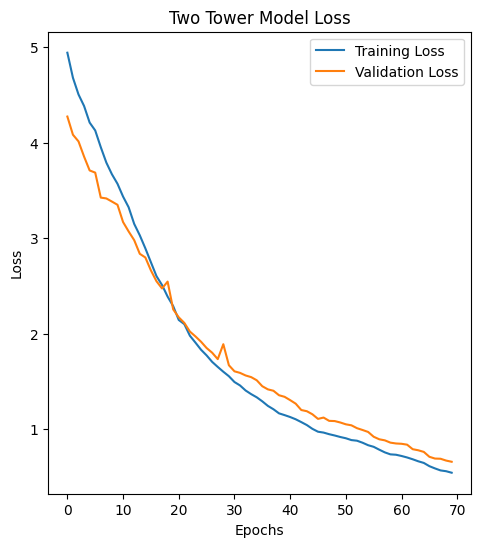

In [98]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))


plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Two Tower Model Loss')
plt.legend()

In [99]:
model.save('two_tower_model_with_album.h5')

In [100]:
model.save('two_tower_model_with_album.keras')

# hyperparameter tuning

In [101]:
# pip install keras-tuner

In [102]:
# from keras_tuner import HyperModel, HyperParameters, RandomSearch
# from tensorflow.keras import layers, models, regularizers

In [103]:
# #inputs layers
# track_id_input = Input(shape=(1,), name='track_id_input_layer')
# name_input = Input(shape=(max_len_name,), name='name_input_layer')
# artist_input = Input(shape=(1,), name='artist_input_layer')
# tags_input = Input(shape=(max_len_tags,), name='tags_input_layer')
# genre_input = Input(shape=(1,), name='genre_input_layer')
# num_features_input = Input(shape=(num_feat_len,), name='num_features_input_layer')

In [104]:
# max_len_name, max_len_tags, num_feat_len

In [105]:
# class SimilarityModel(HyperModel):
#     def build(self, hp):
#         # Inputs
#         track_id_input = Input(shape=(1,), name='track_id_input_layer')
#         name_input = Input(shape=(max_len_name,), name='name_input_layer')
#         artist_input = Input(shape=(1,), name='artist_input_layer')
#         tags_input = Input(shape=(max_len_tags,), name='tags_input_layer')
#         genre_input = Input(shape=(1,), name='genre_input_layer')
#         num_features_input = Input(shape=(num_feat_len,), name='num_features_input_layer')

#         user_id_input = Input(shape=(1,), name='user_id_input_layer')
#         playcount_input = Input(shape=(1,), name='playcount_input_layer')

#         # Item Tower
#         track_id_embedding = Flatten()(Embedding(input_dim=num_unique_track_id,
#                                                  output_dim=hp.Choice('track_id_embedding_dim', [16, 32, 64]),
#                                                  embeddings_regularizer=regularizers.l2(1e-3))(track_id_input))
#         name_embedding = Flatten()(Embedding(input_dim=num_unique_names,
#                                              output_dim=hp.Choice('name_embedding_dim', [16, 32, 64]),
#                                              embeddings_regularizer=regularizers.l2(1e-3))(name_input))
#         artist_embedding = Flatten()(Embedding(input_dim=num_unique_artists,
#                                                output_dim=hp.Choice('artist_embedding_dim', [16, 32, 64]),
#                                                embeddings_regularizer=regularizers.l2(1e-3))(artist_input))
#         tags_embedding = Flatten()(Embedding(input_dim=num_unique_tags,
#                                              output_dim=hp.Choice('tags_embedding_dim', [16, 32, 64]),
#                                              embeddings_regularizer=regularizers.l2(1e-3))(tags_input))
#         genre_embedding = Flatten()(Embedding(input_dim=num_unique_genre,
#                                               output_dim=hp.Choice('genre_embedding_dim', [16, 32, 64]),
#                                               embeddings_regularizer=regularizers.l2(1e-3))(genre_input))

#         numerical_dense = Dense(hp.Int('num_dense_units', min_value=16, max_value=128, step=16),
#                                 activation='relu',
#                                 kernel_regularizer=regularizers.l2(1e-3))(num_features_input)

#         # Concatenation of item embeddings
#         concatenated = concatenate([track_id_embedding, name_embedding, artist_embedding, tags_embedding, genre_embedding, numerical_dense])

#         # Dense Layers for Item Tower
#         dense1 = Dense(hp.Int('item_dense1_units', min_value=16, max_value=128, step=16), activation='relu')(concatenated)
#         norm = BatchNormalization()(dense1)
#         norm = Dropout(hp.Float('item_dropout_rate', min_value=0.2, max_value=0.75, step=0.05))(norm)
#         item_embedding = Dense(hp.Int('final_dense_units', min_value=16, max_value=128, step=16), activation='relu')(norm)

#         # User Tower
#         x_user_id = Flatten()(Embedding(input_dim=num_unique_user_id,
#                                         output_dim=hp.Choice('user_id_embedding_dim', [16, 32, 64]),
#                                         embeddings_regularizer=regularizers.l2(1e-3))(user_id_input))
#         x_user = concatenate([x_user_id, playcount_input])
#         x_user = Dense(hp.Int('user_dense_units', min_value=16, max_value=128, step=16), activation='relu')(x_user)
#         x_norm = BatchNormalization()(x_user)
#         x_norm = Dropout(hp.Float('user_dropout_rate', min_value=0.2, max_value=0.75, step=0.05))(x_norm)
#         user_embedding = Dense(hp.Int('final_dense_units', min_value=16, max_value=128, step=16), activation='relu')(x_norm)

#         # Similarity Layer
#         item_norm = BatchNormalization()(item_embedding)
#         user_norm = BatchNormalization()(user_embedding)
#         similarity = SimilarityLayer()(inputs=[item_norm, user_norm])

#         optimizer_tune = tf.keras.optimizers.Adam(
#             learning_rate=hp.Float("learning_rate", min_value=1e-4, max_value=1e-2, sampling="log")
#         )

#         # Create model
#         model = Model(inputs=[track_id_input, name_input, artist_input, tags_input, genre_input, num_features_input, user_id_input, playcount_input],
#                       outputs=similarity)

#         # Compile model
#         model.compile(optimizer=optimizer_tune, loss='binary_crossentropy')

#         return model

In [106]:
# tuner = RandomSearch(
#     SimilarityModel(),
#     objective='val_loss',
#     max_trials=10,
#     executions_per_trial=1,
#     directory='tuner_dir',
#     overwrite=True,
#     project_name='similarity_model_tuning'
# )

In [107]:
# from tensorflow.keras.callbacks import EarlyStopping
# early_stopping = EarlyStopping(
#     monitor='val_loss',
#     patience=3,
#     restore_best_weights=True
# )

In [108]:
# tuner.search(
#     x=[X_train_track_id, X_train_name, X_train_artist, X_train_tags, X_train_genre, X_train_num_feats, X_train_user_id, X_train_playcount],
#     y=y_train,
#     epochs=20,
#     batch_size=32,
#     validation_data=(
#         [X_val_track_id, X_val_name, X_val_artist, X_val_tags, X_val_genre, X_val_num_feats, X_val_user_id, X_val_playcount],
#         y_val
#     ),
#     callbacks=[early_stopping]
# )

In [109]:
# tuner.search(
#     x=[X_train_track_id, X_train_name, X_train_artist, X_train_tags, X_train_genre, X_train_num_feats, X_train_user_id, X_train_playcount],
#     y=y_train,
#     epochs=20,
#     batch_size=32,
#     validation_data=(
#         [X_val_track_id, X_val_name, X_val_artist, X_val_tags, X_val_genre, X_val_num_feats, X_val_user_id, X_val_playcount],
#         y_val
#     ),
#     callbacks=[early_stopping]
# )

In [110]:
# import shutil
# from google.colab import files

# shutil.make_archive('tuner_dir', 'zip', 'tuner_dir')
# files.download('tuner_dir.zip')

In [111]:
# model.save('/content/drive/MyDrive/THESIS/FINAL/two_tower_model.h5')
# # model.save('/content/drive/MyDrive/Thesis/Model/two_tower_model.h5') #yujin

In [112]:
# model.save('/content/drive/MyDrive/THESIS/FINAL/two_tower_model.keras')
# # model.save('/content/drive/MyDrive/Thesis/Model/two_tower_model.keras') #yujin

In [113]:
# import pickle

# with open('/content/drive/MyDrive/THESIS/FINAL/two_tower_history.pkl', 'wb') as f:
# # with open('/content/drive/MyDrive/Thesis/Model/two_tower_history.pkl', 'wb') as f: #yujin
#     pickle.dump(history.history, f)

# EVALUATION

In [114]:
for layer in model.layers:
    print(layer.name)

track_id_input_layer
name_input_layer
artist_input_layer
tags_input_layer
genre_input_layer
track_id_embedding
name_embedding
artist_embedding
tags_embedding
genre_embedding
num_features_input_layer
user_id_input_layer
track_id_global_avg_pooling
name_global_avg_pooling
artist_global_avg_pooling
tags_global_avg_pooling
genre_global_avg_pooling
numerical_dense
image_input_layer
user_id_embedding
item_concatenated
image_embedding
user_global_avg_pooling
playcount_input_layer
concatenated_with_image
user_concatenated
item_dense1
user_dense
item_norm
user_norm
item_dropout
user_dropout
item_embedding
user_embedding
item_norm2
user_norm2
similarity


In [115]:
filtered_data = merged_data[['track_id', 'name', 'artist', 'tags', 'genre'] + num_features + ['image_embedding']]
# filtered_data = merged_data[['track_id', 'name', 'artist', 'tags', 'genre'] + num_features]
filtered_data

,track_id,name,artist,tags,genre,year,duration_ms,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,key,mode,time_signature,image_embedding
0,3726,"[190, 4594]",1203,"[53, 20, 92, 69]",5,0.991597,0.242788,0.342873,0.101982,0.469299,0.023010,0.986948,0.829980,0.170392,0.034591,0.465681,0.636364,0.0,0.75,"[0.006369805, 0.0, 0.1475311, 0.0, 0.11018719,..."
1,3726,"[190, 4594]",1203,"[53, 20, 92, 69]",5,0.991597,0.242788,0.342873,0.101982,0.469299,0.023010,0.986948,0.829980,0.170392,0.034591,0.465681,0.636364,0.0,0.75,"[0.006369805, 0.0, 0.1475311, 0.0, 0.11018719,..."
2,3726,"[190, 4594]",1203,"[53, 20, 92, 69]",5,0.991597,0.242788,0.342873,0.101982,0.469299,0.023010,0.986948,0.829980,0.170392,0.034591,0.465681,0.636364,0.0,0.75,"[0.006369805, 0.0, 0.1475311, 0.0, 0.11018719,..."
3,3726,"[190, 4594]",1203,"[53, 20, 92, 69]",5,0.991597,0.242788,0.342873,0.101982,0.469299,0.023010,0.986948,0.829980,0.170392,0.034591,0.465681,0.636364,0.0,0.75,"[0.006369805, 0.0, 0.1475311, 0.0, 0.11018719,..."
4,3726,"[190, 4594]",1203,"[53, 20, 92, 69]",5,0.991597,0.242788,0.342873,0.101982,0.469299,0.023010,0.986948,0.829980,0.170392,0.034591,0.465681,0.636364,0.0,0.75,"[0.006369805, 0.0, 0.1475311, 0.0, 0.11018719,..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174055,4104,"[4, 1134, 2, 5, 35]",1040,"[71, 93]",6,0.915966,0.108763,0.605944,0.835997,0.866711,0.012540,0.014257,0.021630,0.060193,0.986758,0.564479,0.000000,1.0,0.75,"[0.90396476, 0.88545245, 0.52604884, 0.3354634..."
174056,4424,"[61, 901, 120, 1373, 107, 576]",956,"[8, 35, 48, 24, 10, 64]",2,0.873950,0.843293,0.127133,0.217984,0.736779,0.024275,0.098193,0.958753,0.125689,0.030211,0.453464,0.000000,1.0,0.75,"[0.44970143, 0.011550934, 0.11462873, 0.0, 0.0..."
174057,3723,"[2921, 2922, 98]",344,"[71, 33, 56, 91, 9, 85, 0]",6,0.890756,0.207427,0.337369,0.743995,0.872197,0.104924,0.104418,0.000000,0.743217,0.291069,0.413446,0.090909,1.0,0.50,"[0.24261771, 0.5932986, 0.78669465, 0.9871029,..."
174058,1030,"[14, 15]",1033,"[81, 52]",2,0.907563,0.122670,0.632361,0.602992,0.892425,0.469627,0.067369,0.000000,0.041896,0.862492,0.501971,0.545455,1.0,0.75,"[0.27947986, 1.0067167, 0.148405, 5.7429683e-0..."


In [116]:
filtered_data = filtered_data.drop_duplicates(subset='track_id', keep='first')

In [117]:
from sklearn.metrics.pairwise import cosine_similarity

In [118]:
user_embedding_layer = model.get_layer('user_norm2')
user_embedding_model = Model(inputs=user_model.input, outputs=user_embedding_layer.output)

In [119]:
def get_user_embedding(user_id):

    filtered_data = merged_data[merged_data['user_id'] == user_id]
    user_input = [
        np.array(filtered_data['user_id']).astype('int32'),
        np.array(filtered_data['playcount']).astype('float32')
    ]

    user_embedding = user_embedding_model.predict(user_input)
    user_embedding_norm = user_embedding / np.linalg.norm(user_embedding)
    return user_embedding_norm

In [120]:
item_embedding_layer = model.get_layer('item_norm2')
item_embedding_model = Model(inputs=item_model.input, outputs=item_embedding_layer.output)

In [121]:
def get_item_embeddings():

  # image_embeddings = np.stack(filtered_data['image_embedding'].values)
  item_input = [
      np.array(filtered_data['track_id']).astype('int32'),
      pad_sequences(filtered_data['name'], maxlen=max_len_name),
      np.array(filtered_data['artist']).astype('int32'),
      pad_sequences(filtered_data['tags'], maxlen=max_len_tags),
      np.array(filtered_data['genre']).astype('int32'),
      np.array(filtered_data[num_features]).astype('float32'),
      np.array(filtered_data['image_embedding'].values.tolist())

  ]

  item_embedding = item_embedding_model.predict(item_input)
  item_embedding_norm = item_embedding / np.linalg.norm(item_embedding)

  return item_embedding_norm

In [122]:
def recommendations(user_id, top_k=10, track_ids=None):
    # user embedding for user id
    user_embedding = get_user_embedding(user_id)

    # get all item embeddings
    item_embeddings = get_item_embeddings()

    # similarity for user and item
    similarities = cosine_similarity(user_embedding, item_embeddings)

    # top k scores
    top_k_indices = np.argsort(similarities[0])[::-1][:top_k]

    # retrieve track_id
    if track_ids is not None:
        top_k_items = [track_ids[i] for i in top_k_indices]
    else:
        top_k_items = top_k_indices.tolist()

    return top_k_items, similarities[0][top_k_indices]

In [123]:
track_ids = merged_data['track_id'].drop_duplicates().tolist()

In [124]:
# testing_data = test_data[test_data['user_id'].isin(test_data['user_id'].unique()[:500])]
testing_data= val_data[val_data['user_id'].isin(val_data['user_id'].unique()[:500])]

In [125]:
testing_data.value_counts('user_id')

user_id
17      4
5573    4
5799    4
5791    4
5764    4
       ..
2734    4
2678    4
2674    4
2625    4
8674    4
Name: count, Length: 500, dtype: int64

In [126]:
def hit_rate_at_k(df, k):
  track_ids = merged_data['track_id'].drop_duplicates().tolist()

  grouped = df.groupby('user_id')
  hit_rates = []

  for user_id, group in grouped:
    user_songs = group[group['user_id'] == user_id]
    user_listened = group[group['label'] == 1]

    rec_tracks, _ = recommendations(user_id, k, track_ids)
    listened_tracks = user_listened['track_id'].tolist()

    hit_rate = 0

    for track in rec_tracks:
      if track in listened_tracks:
        hit_rate = 1
        break

    hit_rates.append(hit_rate)

  return np.mean(hit_rates), hit_rates

In [127]:
def recall_at_k(df, k):
  grouped = df.groupby('user_id')
  track_ids = merged_data['track_id'].drop_duplicates().tolist()
  recall_list = []

  for user_id, group in grouped:
    user_songs = group[group['user_id'] == user_id]
    user_listened = user_songs[user_songs['label'] == 1]

    rec_tracks, _ = recommendations(user_id, k, track_ids)
    listened_tracks = user_listened['track_id'].tolist()

    relevant_rec = [track for track in rec_tracks if track in listened_tracks]
    recall = len(relevant_rec) / len(listened_tracks) if len(listened_tracks) > 0 else 0
    recall_list.append(recall)

  return np.mean(recall_list), recall_list

In [128]:
# hit_rate_1, hit_rates_1 = hit_rate_at_k(testing_data, k=1)
# print(f"Hit Rate at 1: {hit_rate_1}")

In [129]:
hit_rate_10, hit_rates_10 = hit_rate_at_k(testing_data, k=10)
print(f"HitRate@10: {hit_rate_10}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


/Users/eugeniapramesti/Documents/GitHub/thesis/.venv/lib/python3.10/site-packages/keras/src/models/functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['user_id_input_layer', 'playcount_input_layer']. Received: the structure of inputs=('*', '*')
  warnings.warn(


 87/162 ━━━━━━━━━━━━━━━━━━━━ 0s 585us/step

/Users/eugeniapramesti/Documents/GitHub/thesis/.venv/lib/python3.10/site-packages/keras/src/models/functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['track_id_input_layer', 'name_input_layer', 'artist_input_layer', 'tags_input_layer', 'genre_input_layer', 'num_features_input_layer', 'image_input_layer']. Received: the structure of inputs=('*', '*', '*', '*', '*', '*', '*')
  warnings.warn(


162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 950us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 603us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 576us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 567us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 598us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 634us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 569us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 580us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 593us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 562us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 581us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 579us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 

In [130]:
# hit_rate_20, hit_rates_20 = hit_rate_at_k(testing_data, k=20)
# print(f"HitRate@20: {hit_rate_20}")

In [131]:
# hit_rate_50, hit_rates_50 = hit_rate_at_k(testing_data, k=50)
# print(f"HitRate@50: {hit_rate_50}")

In [132]:
# hit_rate_100, hit_rates_100 = hit_rate_at_k(testing_data, k=100)
# print(f"HitRate@100: {hit_rate_100}")

In [133]:
# print(f"HitRate@1: {hit_rate_1}")
# print(f"HitRate@10: {hit_rate_10}")
# print(f"HitRate@50: {hit_rate_50}")
# print(f"HitRate@100: {hit_rate_100}")

In [134]:
# recall_1, recalls_1 = recall_at_k(testing_data, k=1)
# print(f"Recall@1: {recall_1}")

In [135]:
recall_10, recalls_10 = recall_at_k(testing_data, k=10)
print(f"Recall@10: {recall_10}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 565us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 564us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 573us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 590us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 566us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 565us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 571us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 573us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 647us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 657us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 581us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 646us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 

In [136]:
# recall_20, recalls_20 = recall_at_k(testing_data, k=20)
# print(f"Recall@20: {recall_20}")

In [137]:
# recall_50, recalls_50 = recall_at_k(testing_data, k=50)
# print(f"Recall@50: {recall_50}")

In [138]:
# recall_100, recalls_100 = recall_at_k(testing_data, k=100)
# print(f"Recall@100: {recall_100}")

In [ ]:
# print(f"Recall@1: {recall_1}")
# print(f"Recall@10: {recall_10}")
# print(f"Recall@50: {recall_50}")
# print(f"Recall@100: {recall_100}")

NameError: name 'recall_1' is not defined

# HIT RATE & RECALL

In [140]:
# from tensorflow.keras.models import load_model

In [141]:
# model = load_model('/content/drive/MyDrive/THESIS/FINAL/two_tower_model.h5', custom_objects={'SimilarityLayer': SimilarityLayer})
# model = load_model('/content/drive/MyDrive/Thesis/Model/two_tower_model.h5', custom_objects={'SimilarityLayer': SimilarityLayer}) #yujin
# model_album = load_model('/content/drive/MyDrive/THESIS/FINAL/two_tower_model.h5', custom_objects={'SimilarityLayer': SimilarityLayer})

In [142]:
# merged_data.head()

In [143]:
# X_track_id = np.array(merged_data['track_id']).astype('int32')

# X_name = pad_sequences(merged_data['name'], maxlen=max_len_name)

# X_artist = np.array(merged_data['artist']).astype('int32')

# X_tags = pad_sequences(merged_data['tags'], maxlen=max_len_tags)

# X_genre = np.array(merged_data['genre']).astype('int32')

# X_num_feats = np.array(merged_data[num_features])

# X_user_id = np.array(merged_data['user_id']).astype('int32')

# X_playcount= np.array(merged_data['playcount'])

In [144]:
# all_pred = model.predict([
#     X_test_track_id,
#     X_test_name,
#     X_test_artist,
#     X_test_tags,
#     X_test_genre,
#     X_test_num_feats,
#     X_test_user_id,
#     X_test_playcount
# ])

In [145]:
# predicted_df = pd.DataFrame(all_pred, columns=['predicted_prob'])
# predicted_df['user_id'] = X_test_user_id
# predicted_df['track_id'] = X_test_track_id

In [146]:
# predicted_df

In [147]:
# def top_k_recs(user_id, k):
#   user_pred = predicted_df[predicted_df['user_id'] == user_id]

#   user_pred_sorted = user_pred.sort_values(by='predicted_prob', ascending=False)

#   top_k_songs = user_pred_sorted.head(k)

#   return top_k_songs[['user_id', 'track_id', 'predicted_prob']]

In [148]:
# # user id = 1421
# top_rec_for_user = top_k_recs(user_id=2790, k=10)

In [149]:
# top_rec_for_user

In [150]:
# user_songs = merged_data[merged_data['user_id'] == 2790]
# user_listened = user_songs[user_songs['label'] == 1]

In [151]:
# user_listened[['user_id', 'track_id']]

In [152]:
# user_songss = test_data[test_data['user_id'] == 2790]
# user_listeneds = user_songss[user_songss['label'] == 1]
# user_not_listened = user_songss[user_songss['label'] == 0]

In [153]:
# test_data[test_data['user_id'] == 2790]

In [154]:
# user_listeneds[['user_id', 'track_id']]

In [155]:
# user_not_listened[['user_id', 'track_id']]

In [156]:
# rec_tracks = top_rec_for_user['track_id'].tolist()
# listened_tracks = user_listened['track_id'].tolist()

In [157]:
# print(f"Recommendations : {rec_tracks}")
# print(f"Listened Tracks : {listened_tracks}")

In [158]:
# hit = 0
# for track in rec_tracks:
#   if track in listened_tracks:
#     hit += 1
#     break
# print(f"Hit ? : {hit}")

In [159]:
# relevant_rec = [track for track in rec_tracks if track in listened_tracks]
# print(f"Relevant Tracks : {relevant_rec}")

In [160]:
# print(f"Total Relevant Tracks : {len(relevant_rec)}")
# print(f"Total Listened Tracks : {len(listened_tracks)}")

In [161]:
# recall = len(relevant_rec) / len(listened_tracks) if len(listened_tracks) > 0 else 0
# print(f"Recall : {recall}")

In [162]:
# def hit_rate_at_k(df, k):
#   grouped = df.groupby('user_id')
#   hit_rates = []

#   for user_id, group in grouped:
#     user_songs = group[group['user_id'] == user_id]
#     user_listened = group[group['label'] == 1]

#     rec_tracks = top_k_recs(user_id, k)['track_id'].tolist()
#     listened_tracks = user_listened['track_id'].tolist()

#     hit_rate = 0

#     for track in rec_tracks:
#       if track in listened_tracks:
#         hit_rate = 1
#         break

#     hit_rates.append(hit_rate)

#   return np.mean(hit_rates), hit_rates

In [163]:
# def recall_at_k(df, k):
#   grouped = df.groupby('user_id')
#   recall_list = []

#   for user_id, group in grouped:
#     user_songs = group[group['user_id'] == user_id]
#     user_listened = user_songs[user_songs['label'] == 1]

#     rec_tracks = top_k_recs(user_id, k)['track_id'].tolist()
#     listened_tracks = user_listened['track_id'].tolist()

#     relevant_rec = [track for track in rec_tracks if track in listened_tracks]
#     recall = len(relevant_rec) / len(listened_tracks) if len(listened_tracks) > 0 else 0
#     recall_list.append(recall)

#   return np.mean(recall_list), recall_list

In [164]:
# test_data

In [165]:
# test_data[['user_id', 'label']].sort_values(by='user_id')

In [166]:
# k=10

In [167]:
# k1 = 3
# hit_rate, hit_rates = hit_rate_at_k(test_data, k)

In [168]:
# hit_rate, hit_rates = hit_rate_at_k(test_data, k)

In [169]:
# print(f"HitRate@{k}: {hit_rate}")

In [170]:
# hit_rates

In [171]:
# recall, recalls = recall_at_k(test_data, k)

In [172]:
# print(f"Recall@{k}: {recall}")

In [173]:
# recalls